In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('/kaggle/input/total-data/total_df.csv')

In [3]:
df['TIME'] = df['TIME'].apply(lambda x: str(x).zfill(6))

In [4]:
df

,RECV_DEPT_NM,YEAR,MONTH,DAY,TIME,day_of_week,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,20,1,1,000007,Wed,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,대전청,20,1,1,000132,Wed,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,대전청,20,1,1,000039,Wed,13,10,501,1,NaN,127.404663,36.341685,NaN
3,대전청,20,1,1,000110,Wed,13,10,601,3,NaN,0.000000,0.000000,NaN
4,대전청,20,1,1,000342,Wed,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849376,대전청,23,1,12,112309,Thu,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
3849377,충남청,23,1,16,115947,Mon,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
3849378,충남청,23,1,16,115854,Mon,19,10,601,3.0,NaN,NaN,NaN,NaN
3849379,충남청,23,1,14,010047,Sat,19,10,601,3.0,NaN,NaN,NaN,NaN


In [5]:
df['day_of_week'].value_counts()

Sat    591708
Fri    573987
Wed    544481
Thu    543273
Mon    535114
Tue    535039
Sun    525779
Name: day_of_week, dtype: int64

In [6]:
df['TIME'].value_counts()

231113    92
223516    89
220830    89
220334    88
215557    88
          ..
055633     6
055231     6
053441     6
051351     6
043156     6
Name: TIME, Length: 86400, dtype: int64

# 사건 처리 상태에 따른 분류

<AxesSubplot:xlabel='EVT_STAT_CD', ylabel='count'>

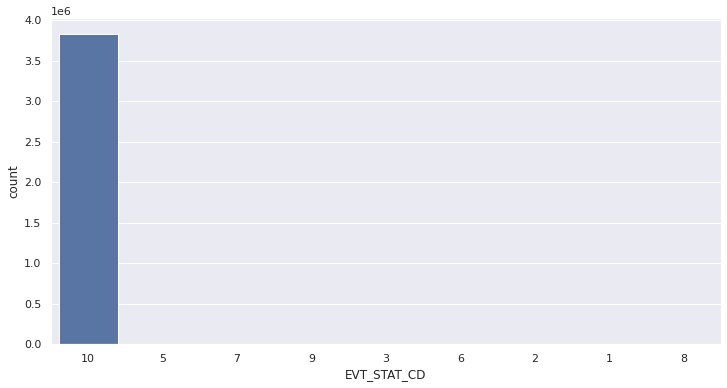

In [7]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x='EVT_STAT_CD', order = df['EVT_STAT_CD'].value_counts().index, data=df)

# 사건 종류에 따른 분류

<AxesSubplot:xlabel='EVT_CL_CD', ylabel='count'>

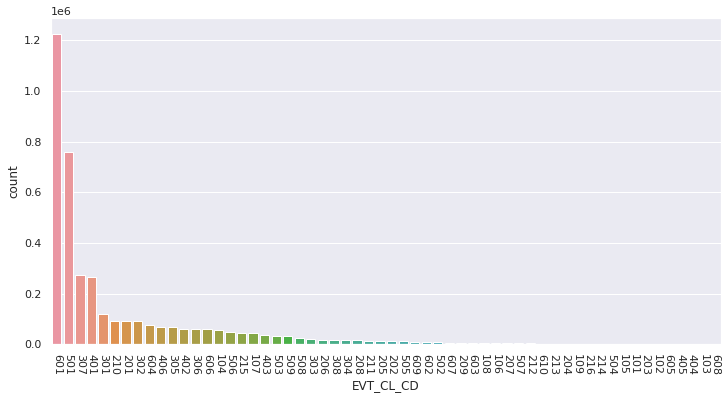

In [8]:
plt.xticks(rotation = -90)
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x='EVT_CL_CD',order = df['EVT_CL_CD'].value_counts().index, data=df)

# 월별/요일별/시간별 사건 분포
  1. 전체 사건
  2. 보이스피싱

<AxesSubplot:xlabel='MONTH', ylabel='count'>

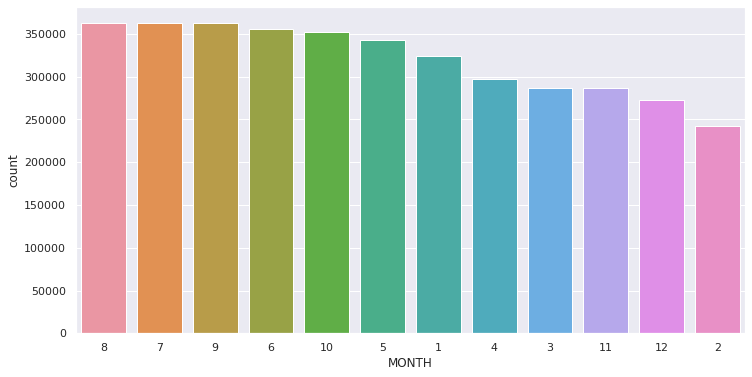

In [9]:
# 월별 전체사건 신고 분포
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x=df['MONTH'],order = df['MONTH'].value_counts().index, data=df)

<AxesSubplot:xlabel='MONTH', ylabel='count'>

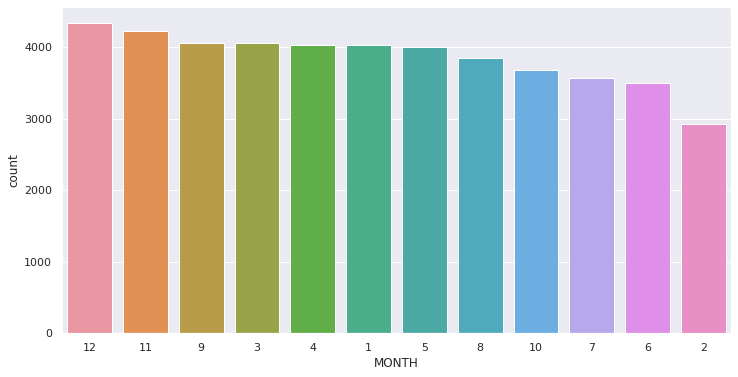

In [10]:
#월별 보이스피싱 신고 분포 (#215)
#sns.barplot(x= df['MONTH'], y=df['EVT_CL_CD']& 215, data=df)
import seaborn as sns
df2 = df.loc[df['EVT_CL_CD'] == 215]

sns.countplot(x='MONTH',order = df2['MONTH'].value_counts().index, data=df2)

<AxesSubplot:xlabel='DAY', ylabel='count'>

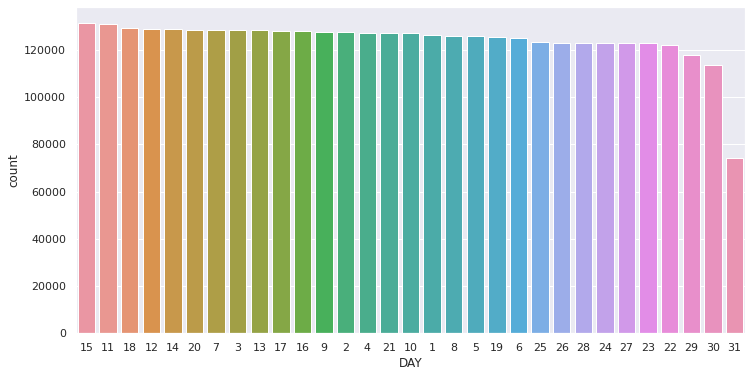

In [12]:
#특정 날짜에 신고된 전체 범죄
sns.countplot(x=df['DAY'],order = df['DAY'].value_counts().index, data=df)

<AxesSubplot:xlabel='DAY', ylabel='count'>

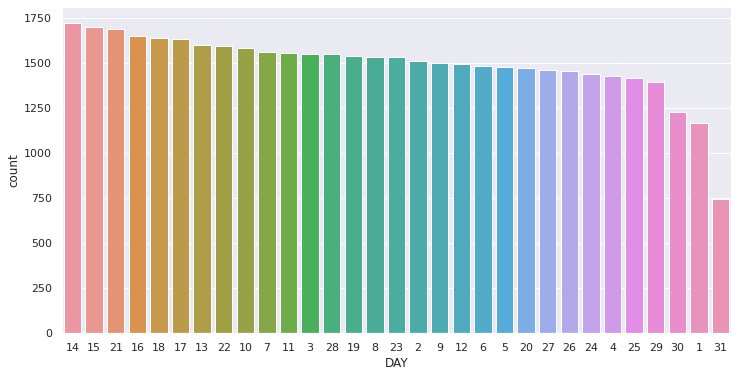

In [13]:
# 특정 날짜에 신고된 보이스피싱(#215)
sns.countplot(x='DAY',order = df2['DAY'].value_counts().index, data=df2)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

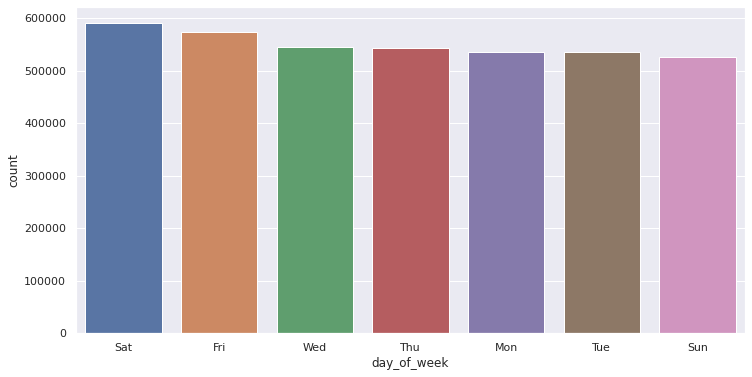

In [14]:
# 요일별로 신고된 전체 범죄
sns.countplot(x=df['day_of_week'], order = df['day_of_week'].value_counts().index,data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

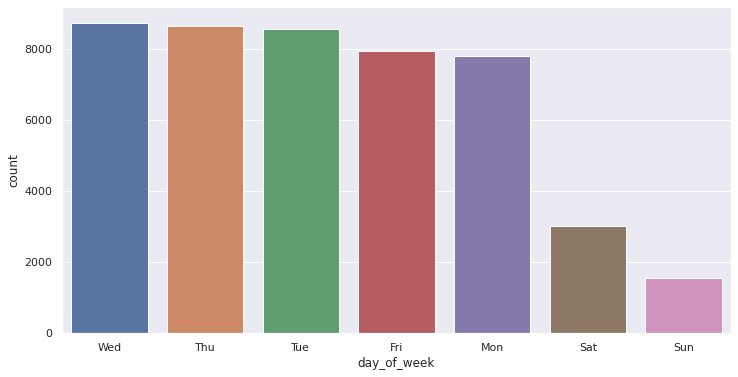

In [15]:
# 요일별로 신고된 보이스피싱(#215)
sns.countplot(x='day_of_week',order = df2['day_of_week'].value_counts().index, data=df2)

In [16]:
df2['day_of_week'].value_counts()

Wed    8740
Thu    8639
Tue    8561
Fri    7947
Mon    7812
Sat    3005
Sun    1564
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='TIME', ylabel='count'>

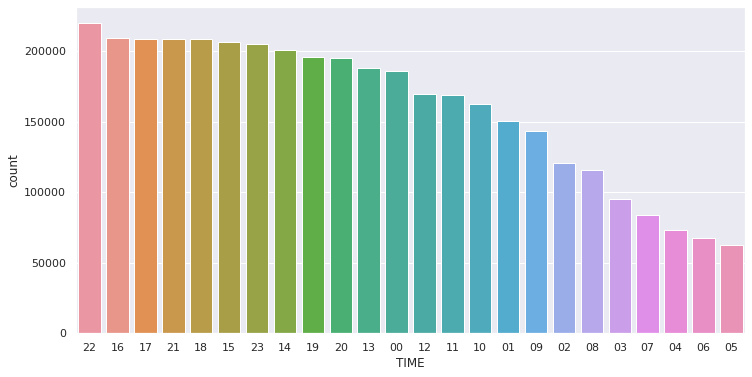

In [17]:
# 시간대별로 신고된 전체 범죄 (23-06:59/07-14:59/15-22:59)

df['TIME'] = df['TIME'].str.slice(start = 0, stop =2)
sns.countplot(x=df['TIME'], data=df ,order = df['TIME'].value_counts().index)
#['23','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22']

<AxesSubplot:xlabel='TIME', ylabel='count'>

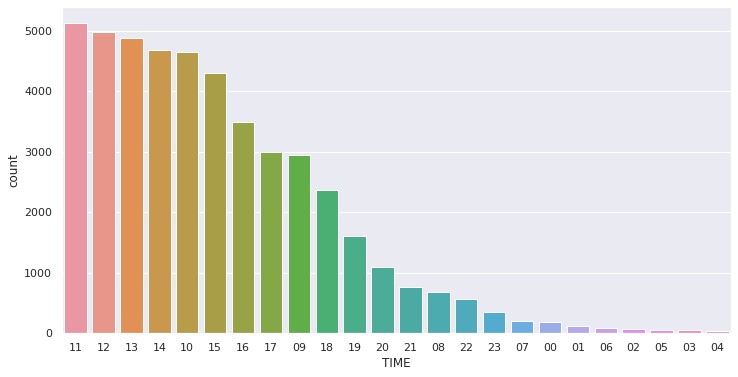

In [18]:
# 시간대별로 신고된 보이스피싱(#215) (23-06:59/07-14:59/15-22:59)
df2['TIME'] = df2['TIME'].str.slice(start = 0, stop =2)
sns.countplot(x=df2['TIME'], data=df2 ,order = df2['TIME'].value_counts().index)

In [19]:
df2['TIME'] = df2['TIME'].str.slice(start = 0, stop =2)
df2['TIME'].value_counts()

11    5130
12    4983
13    4870
14    4675
10    4643
15    4293
16    3489
17    3001
09    2943
18    2366
19    1602
20    1095
21     765
08     674
22     569
23     354
07     198
00     181
01     128
06      91
02      77
05      55
03      52
04      34
Name: TIME, dtype: int64

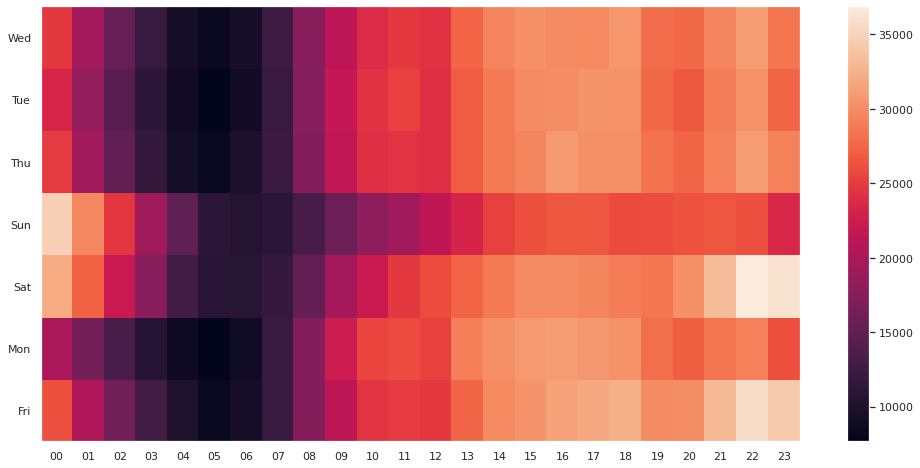

In [20]:
# 요일별+시간대별 전체사건 신고
df_pivot_table = pd.pivot_table(df, values='EVT_CL_CD', aggfunc='count',
               index=['day_of_week'],
               columns=['TIME'])

plt.figure(figsize=(17,8))
plt.pcolor(df_pivot_table)
plt.xticks(np.arange(0.5,len(df_pivot_table.columns),1),df_pivot_table.columns)
plt.yticks(np.arange(0.5,len(df_pivot_table.index),1),df_pivot_table.index)
plt.colorbar()
plt.show()

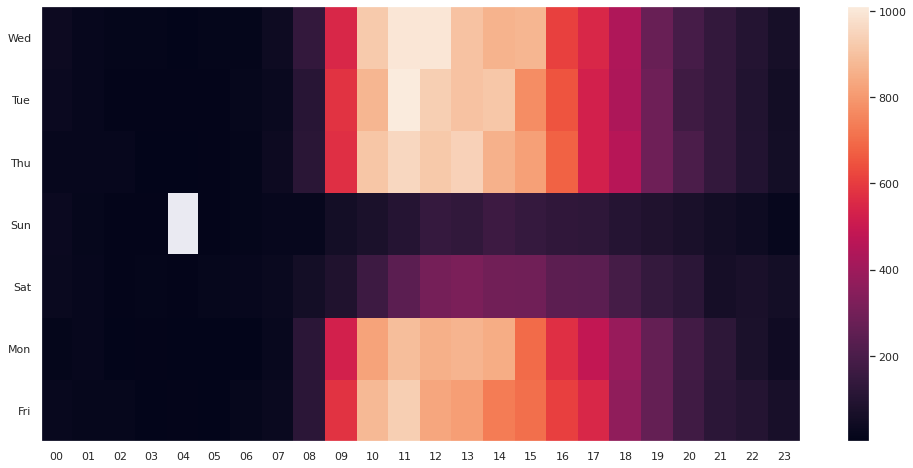

In [21]:
# 요일별+시간대별 보이스피싱 신고

df2_pivot_table = pd.pivot_table(df2, values='EVT_CL_CD', aggfunc='count',
               index=['day_of_week'],
               columns=['TIME'])

plt.figure(figsize=(17,8))
plt.pcolor(df2_pivot_table)
plt.xticks(np.arange(0.5,len(df2_pivot_table.columns),1),df2_pivot_table.columns)
plt.yticks(np.arange(0.5,len(df2_pivot_table.index),1),df2_pivot_table.index)
plt.colorbar()
plt.show()